# Part 1

In [1]:
import os
import pandas as pd
import numpy as np
from natsort import natsorted
import re
import string
from collections import Counter
import timeit
import matplotlib.pyplot as plt

In [2]:
a = os.listdir('train/pos')
a = natsorted(a)
train_pos_filename = []
train_pos = []
for x in a:
    file_path = "train/pos/"+x
    f = open(file_path,'r+',encoding = "utf8")
    read = f.read()
    train_pos.append(read)
    train_pos_filename.append(x)
f.close()

In [3]:
a = os.listdir('train/neg')
a = natsorted(a)
train_neg = []
train_neg_filename = []
for x in a:
    file_path = "train/neg/"+x
    f = open(file_path,'r+',encoding = "utf8")
    read = f.read()
    train_neg.append(read)
    train_neg_filename.append(x)
f.close()

In [4]:
#reading stop words
f = open('stop_words.txt', 'r+')
stop_words = f.read().splitlines()

In [5]:
#reading positive words
f = open('positive_words.txt', 'r+')
pos_words = f.read().splitlines()
#reading negative words
f = open('negative_words.txt', 'r+')
neg_words = f.read().splitlines()

In [6]:
#converting to lowercase
def conv_lc(x):
    x = list(map(lambda x: x.lower(), x))
    return x

In [7]:
#removing stop words
def remove_stopwords(x):
    stop = re.compile(r'\b%s\b' % r'\b|\b'.join(map(re.escape, stop_words)))
    for i,j in enumerate(x):    
        x[i] = stop.sub("", j)
    return x

In [8]:
#removing punctuations
def remove_punc(x):
    table = str.maketrans(dict.fromkeys(string.punctuation))
    for i, j in enumerate(x):
        x[i]=j.translate(table)
    return x

In [9]:
def word_count(a):
    l =0
    pos=[]
    neg=[]
    for i in a:
        pos_count=0
        neg_count=0
        words= Counter(i.split())
        for x in words:
            if x in pos_words:
                pos_count+=words[x]
            if x in neg_words:
                neg_count+=words[x]
        pos.append(pos_count)
        neg.append(neg_count)
    return pos, neg

In [10]:
train_pos=conv_lc(train_pos)
train_neg=conv_lc(train_neg)

train_pos=remove_stopwords(train_pos)
train_neg=remove_stopwords(train_neg)

train_pos=remove_punc(train_pos)
train_neg=remove_punc(train_neg)

In [11]:
train_pos_pos_count, train_pos_neg_count = word_count(train_pos)
train_neg_pos_count, train_neg_neg_count = word_count(train_neg)

In [12]:
df_pos = pd.DataFrame(columns=['filename','review'])
df_pos['filename']=train_pos_filename
df_pos['review']=train_pos
df_pos['x0']=1
df_pos['x1']=train_pos_pos_count
df_pos['x2']=train_pos_neg_count
df_pos['y']= 1

df_neg = pd.DataFrame(columns=['filename','review'])
df_neg['filename']=train_neg_filename
df_neg['review']=train_neg
df_neg['x0']=1
df_neg['x1']=train_neg_pos_count
df_neg['x2']=train_neg_neg_count
df_neg['y']= 0

In [13]:
df=pd.DataFrame()
df=df_pos
df = df.append(df_neg)
df

,filename,review,x0,x1,x2,y
0,0_9.txt,bromwell high cartoon comedy ran time ...,1,5,5,1
1,1_7.txt,like adult comedy cartoons like south park ...,1,7,5,1
2,2_9.txt,bromwell high nothing short brilliant expert...,1,10,6,1
3,3_10.txt,world stage people actors something lik...,1,2,1,1
4,4_8.txt,futz show preserved experimental theatre ...,1,12,11,1
...,...,...,...,...,...,...
12495,12495_1.txt,ok love bad horror especially love horror ba...,1,15,17,0
12496,12496_1.txt,brutally honest loved watching severed br...,1,8,4,0
12497,12497_4.txt,sure folks texaslouisiana border must ...,1,8,1,0
12498,12498_2.txt,film kernel really good story work men...,1,11,6,0


In [14]:
#Sigmoid Function
def sigmoid(T,X):
    return (1/(1+np.exp(-(np.matmul(X,T)))))

In [15]:
#Cross-Entropy Loss function
def cost(T,X,Y):
    s=0.0
    j = 0.0
    for i in range(m):
        sig = sigmoid(T,X[i])
        s = s+ (Y[i]*np.log(sig) + (1-Y[i])*np.log(1-sig))
    j = (-1/m)*s
    return j

In [16]:
#Batch Gradient Descent function
def gradientDescent(X,Y,T,alpha,n_epoch):
    J = list()  
    for epoch in range(n_epoch):
        for y in range(len(T)):
            sum = 0.0
            for i in range(m): sum = sum + (sigmoid(T,X[i])-Y[i])*X[i][y]
            T[y] = T[y] - (alpha/m)*sum
        #print(T)
        a = cost(T,X,Y)
        if epoch%100 == 0:
            print("cost: ",a,"epoch: ",epoch+1)
        J.append(a)
    return T, J

In [17]:
#Prediction function
def y_prediction(x):
    decision_boundary=0.5
    if x>=decision_boundary:
        return 1
    elif x<decision_boundary:
        return 0

In [18]:
#number of reviews
m = df.shape[0]

#building a feature matrix
X = df.iloc[:,2:5].values

#classification labels
Y = df.iloc[:,5].values

#initializeing theta array
T = np.array([0.0])
T = np.vstack([T,0.0])
T = np.vstack([T,0.0])

#using alpha = 0.1
alpha=0.1
T0, J0 = gradientDescent(X,Y,T,alpha,1000)
#using alpha = 0.01
alpha=0.01
T1, J1 = gradientDescent(X,Y,T,alpha,1000)
#using alpha = 0.001
alpha=0.001
T2, J2 = gradientDescent(X,Y,T,alpha,1000)
#using alpha = 0.0001
alpha=0.0001
T3, J3 = gradientDescent(X,Y,T,alpha,1000)

#picking the best alpha and the corresponding Thetas and cost array(J)
if J0[-1]<J1[-1] and J0[-1]<J2[-1] and J0[-1]<J3[-1]: 
    alpha=0.1
    T = T0
    J = J0
elif J1[-1]<J0[-1] and J1[-1]<J2[-1] and J1[-1]<J3[-1]: 
    alpha=0.01
    T = T1
    J = J1
elif J2[-1]<J0[-1] and J2[-1]<J1[-1] and J2[-1]<J3[-1]: 
    alpha=0.001
    T = T2
    J = J2
elif J3[-1]<J0[-1] and J3[-1]<J1[-1] and J3[-1]<J2[-1]: 
    alpha=0.0001
    T = T3
    J = J3

cost:  [0.960489] epoch:  1
cost:  [0.59939664] epoch:  101
cost:  [0.60015472] epoch:  201
cost:  [0.57599278] epoch:  301
cost:  [0.628404] epoch:  401
cost:  [0.6105794] epoch:  501
cost:  [0.58209477] epoch:  601
cost:  [0.57556983] epoch:  701
cost:  [0.61490793] epoch:  801
cost:  [0.67193401] epoch:  901
cost:  [0.57689011] epoch:  1
cost:  [0.55914207] epoch:  101
cost:  [0.5590998] epoch:  201
cost:  [0.55909538] epoch:  301
cost:  [0.55909162] epoch:  401
cost:  [0.55908831] epoch:  501
cost:  [0.55908539] epoch:  601
cost:  [0.55908281] epoch:  701
cost:  [0.55908053] epoch:  801
cost:  [0.55907852] epoch:  901
cost:  [0.55907676] epoch:  1
cost:  [0.55907659] epoch:  101
cost:  [0.55907643] epoch:  201
cost:  [0.55907627] epoch:  301
cost:  [0.55907611] epoch:  401
cost:  [0.55907595] epoch:  501
cost:  [0.55907579] epoch:  601
cost:  [0.55907564] epoch:  701
cost:  [0.55907549] epoch:  801
cost:  [0.55907534] epoch:  901
cost:  [0.55907519] epoch:  1
cost:  [0.55907518] ep

<function matplotlib.pyplot.show(*args, **kw)>

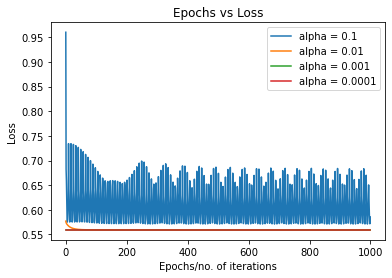

In [40]:
#Reporting plot for epochs vs loss
plt.plot(J0,label="alpha = 0.1")
plt.plot(J1,label="alpha = 0.01")
plt.plot(J2,label="alpha = 0.001")
plt.plot(J3,label="alpha = 0.0001")
plt.xlabel("Epochs/no. of iterations")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show

In [20]:
print("By looking at the graph above we choose aplha =",alpha,"and its corresponding leardned thetas")

By looking at the graph above we choose aplha = 0.0001 and its corresponding leardned thetas


In [21]:
#reading test data (positive)
test_dir = os.listdir('test/pos')
test_dir = natsorted(test_dir)
test_pos_filename = []
test_pos = []
for x_test in test_dir:
    file_path_test_pos = "test/pos/"+x_test
    f_test = open(file_path_test_pos,'r+',encoding = "utf8")
    read_test_pos = f_test.read()
    test_pos.append(read_test_pos)
    test_pos_filename.append(x_test)
f_test.close()

In [22]:
#reading test data (negative)    
test_dir_neg = os.listdir('test/neg')
test_dir_neg = natsorted(test_dir_neg)
test_neg = []
test_neg_filename = []
for x1_test in test_dir_neg:
    file_path_test_neg = "test/neg/"+x1_test
    f_test_neg = open(file_path_test_neg,'r+',encoding = "utf8")
    read_test_neg = f_test_neg.read()
    test_neg.append(read_test_neg)
    test_neg_filename.append(x1_test)
f_test_neg.close()

In [23]:
test_pos=conv_lc(test_pos)
test_neg=conv_lc(test_neg)

test_pos=remove_stopwords(test_pos)
test_neg=remove_stopwords(test_neg)

test_pos=remove_punc(test_pos)
test_neg=remove_punc(test_neg)

In [24]:
test_pos_pos_count, test_pos_neg_count = word_count(test_pos)
print("Done")
test_neg_pos_count, test_neg_neg_count = word_count(test_neg)
print("Done")

Done
Done


In [25]:
#building a DataFrame for test data
df_pos_test = pd.DataFrame(columns=['filename','review'])
df_pos_test['filename']=test_pos_filename
df_pos_test['review']=test_pos
df_pos_test['x0']=1
df_pos_test['x1']=test_pos_pos_count
df_pos_test['x2']=test_pos_neg_count
df_pos_test['y']= 1

df_neg_test = pd.DataFrame(columns=['filename','review'])
df_neg_test['filename']=test_neg_filename
df_neg_test['review']=test_neg
df_neg_test['x0']=1
df_neg_test['x1']=test_neg_pos_count
df_neg_test['x2']=test_neg_neg_count
df_neg_test['y']= 0

In [26]:
df_test=pd.DataFrame()
df_test=df_pos_test
df_test = df_test.append(df_neg_test)
df_test

,filename,review,x0,x1,x2,y
0,0_10.txt,went saw movie last night coaxed frie...,1,4,3,1
1,1_10.txt,boyfriend went watch guardian first wan...,1,7,4,1
2,2_7.txt,yardstick measuring movie watchability g...,1,12,7,1
3,3_7.txt,many movies think see movie like ...,1,17,5,1
4,4_10.txt,movie sadly promoted proved truly excepti...,1,6,1,1
...,...,...,...,...,...,...
12495,12495_3.txt,cybertracker set los angeles sometime near...,1,26,16,0
12496,12496_3.txt,eric phillips wilson secret service agent ...,1,3,5,0
12497,12497_4.txt,plot synopsis los angeles future crime kept...,1,6,13,0
12498,12498_1.txt,oh dear one worst films ever seen unb...,1,4,13,0


In [27]:
#building feature array for test data
X_test = np.array(df_test['x0'])
X_test = np.vstack([X_test,df_test['x1'].values])
X_test = np.vstack([X_test,df_test['x2'].values])
X_test = np.transpose(X_test)

In [28]:
#predicting through the learned Thetas
y_predicted= np.array([])
for i in range(m):
    p = y_prediction(sigmoid(T,X_test[i]))
    y_predicted = np.append(y_predicted,p)

In [29]:
#adding predictions to DataFrame
df_test['prediction']=y_predicted
df_test

,filename,review,x0,x1,x2,y,prediction
0,0_10.txt,went saw movie last night coaxed frie...,1,4,3,1,0.0
1,1_10.txt,boyfriend went watch guardian first wan...,1,7,4,1,1.0
2,2_7.txt,yardstick measuring movie watchability g...,1,12,7,1,1.0
3,3_7.txt,many movies think see movie like ...,1,17,5,1,1.0
4,4_10.txt,movie sadly promoted proved truly excepti...,1,6,1,1,1.0
...,...,...,...,...,...,...,...
12495,12495_3.txt,cybertracker set los angeles sometime near...,1,26,16,0,1.0
12496,12496_3.txt,eric phillips wilson secret service agent ...,1,3,5,0,0.0
12497,12497_4.txt,plot synopsis los angeles future crime kept...,1,6,13,0,0.0
12498,12498_1.txt,oh dear one worst films ever seen unb...,1,4,13,0,0.0


In [30]:
#Evaluation function
def evaluation(df):
    correct=0
    true_pos=0
    false_pos=0
    true_neg=0
    false_neg=0
    for i in range(m):
        if df_test.iloc[i,6] == df_test.iloc[i,5]:        correct+=1
        if df_test.iloc[i,6]==1 and df_test.iloc[i,5]==1: true_pos+=1
        if df_test.iloc[i,6]==1 and df_test.iloc[i,5]==0: false_pos+=1
        if df_test.iloc[i,6]==0 and df_test.iloc[i,5]==0: true_neg+=1
        if df_test.iloc[i,6]==0 and df_test.iloc[i,5]==1: false_neg+=1
    
    accuracy = (correct/m)*100;
    
    print("Accuracy: ", accuracy,"%")       
    print("True postives:",true_pos)
    print("False postives:",false_pos)
    print("True negatives:",true_neg)
    print("False negatives:",false_neg)
    
    print("\nConsfusion Matrix:\n")
    confustion_matrix = pd.DataFrame(columns=['System Output/Gold labels','Gold Positives','Gold Negatives'])
    confustion_matrix['System Output/Gold labels']=['System Positives','System Negatives']
    confustion_matrix['Gold Positives']=[true_pos,false_neg]
    confustion_matrix['Gold Negatives']=[false_pos,true_neg]
    confustion_matrix = confustion_matrix.set_index('System Output/Gold labels')
    print(confustion_matrix)

In [31]:
evaluation(df_test)

Accuracy:  72.976 %
True postives: 9011
False postives: 3267
True negatives: 9233
False negatives: 3489

Consfusion Matrix:

                           Gold Positives  Gold Negatives
System Output/Gold labels                                
System Positives                     9011            3267
System Negatives                     3489            9233


# Part 2 

In [32]:
#importing sklearn logistic regression library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
#training dataset (using the data set from part 1)
print("Using the training data set from part 1")
df

Using the training data set from part 1


,filename,review,x0,x1,x2,y
0,0_9.txt,bromwell high cartoon comedy ran time ...,1,5,5,1
1,1_7.txt,like adult comedy cartoons like south park ...,1,7,5,1
2,2_9.txt,bromwell high nothing short brilliant expert...,1,10,6,1
3,3_10.txt,world stage people actors something lik...,1,2,1,1
4,4_8.txt,futz show preserved experimental theatre ...,1,12,11,1
...,...,...,...,...,...,...
12495,12495_1.txt,ok love bad horror especially love horror ba...,1,15,17,0
12496,12496_1.txt,brutally honest loved watching severed br...,1,8,4,0
12497,12497_4.txt,sure folks texaslouisiana border must ...,1,8,1,0
12498,12498_2.txt,film kernel really good story work men...,1,11,6,0


In [34]:
#isolating the features from the training dataset
X_2 = df.iloc[:,2:5].values
Y_2 = df.iloc[:,5].values

In [35]:
#Implementing sklearn Logistic Regression
LR = LogisticRegression()
LR.fit(X_2,Y_2)

LogisticRegression()

In [36]:
#test dataset (using the data set from part 1)
print("Using the test data set from part 1")
df_test

Using the test data set from part 1


,filename,review,x0,x1,x2,y,prediction
0,0_10.txt,went saw movie last night coaxed frie...,1,4,3,1,0.0
1,1_10.txt,boyfriend went watch guardian first wan...,1,7,4,1,1.0
2,2_7.txt,yardstick measuring movie watchability g...,1,12,7,1,1.0
3,3_7.txt,many movies think see movie like ...,1,17,5,1,1.0
4,4_10.txt,movie sadly promoted proved truly excepti...,1,6,1,1,1.0
...,...,...,...,...,...,...,...
12495,12495_3.txt,cybertracker set los angeles sometime near...,1,26,16,0,1.0
12496,12496_3.txt,eric phillips wilson secret service agent ...,1,3,5,0,0.0
12497,12497_4.txt,plot synopsis los angeles future crime kept...,1,6,13,0,0.0
12498,12498_1.txt,oh dear one worst films ever seen unb...,1,4,13,0,0.0


In [37]:
#isolating the features from the test dataset
X_2_test = df.iloc[:,2:5].values
Y_2_test = df.iloc[:,5]

In [38]:
p_2 = LR.predict(X_test)
accuracy_2 = accuracy_score(Y_2_test,p_2)
print ("Accuracy: ",accuracy_2 )

Accuracy:  0.73092


In [39]:
conf_matrix=confusion_matrix(Y_2_test,p_2)
print("Confusion Matrix: \n",conf_matrix)

Confusion Matrix: 
 [[9156 3344]
 [3383 9117]]
